In [13]:
import numpy as np
import pandas as pd
import re

In [14]:
import warnings;
warnings.filterwarnings('ignore');

In [15]:
# Reading train csv file
df = pd.read_csv(r'C:\Participant_Data_WPPH\Participant_Data_WPPH\train.csv')

# Reading test csv file
test_data = pd.read_csv(r'C:\Participant_Data_WPPH\Participant_Data_WPPH\test.csv')

In [16]:
# Creating copies of original dataframes
df2 = df.copy()

test = test_data.copy()

In [17]:
df.head(50)

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0
5,3bb074528941b3a6823371f77b07fb0f,Cochin Trip with Visit to Guruvayoor Temple,Deluxe,Cochin,2N Cochin,Cochin,30-09-2021,Not Available,Mumbai,IndiGo,1,3,Dutch Palace | Jewish Synagogue | St. Francis...,Not Available,8512.0
6,644c71b1a9ccfe6eacc6303be12c1352,Jaipur Holiday,Standard,Jaipur,3N Jaipur,Jaipur,24-01-2021,Ratnawali A Vegetarian Heritage Hotel:4.1,New Delhi,IndiGo,2,3,Hawa Mahal | City Palace | Jantar Mantar | Am...,Cancellation any time after making the 1st pay...,6848.0
7,07943295cfdce5cb20861e8369948b1d,Kasol & Manali holiday from Delhi,Deluxe,Kasol|Manali,2N Kasol . 3N Manali,Kasol|Manali,10-12-2021,The Himalayan Village:Four|The Holiday Resorts...,Mumbai,Not Available,1,3,Pandoh Dam | Hadimba Temple | Tibetan Monaste...,Cancellation any time after making the 1st pay...,14454.5
8,126e12c63233bf11ef2e001a062f2a53,Charismatic Kashmir with Gulmarg,Deluxe,Srinagar|Gulmarg|Pahalgam|Srinagar,1N Srinagar . 1N Gulmarg . 2N Pahalgam . 2N Sr...,Srinagar|Gulmarg|Pahalgam|Srinagar,03-10-2021,California Group of Houseboats:3.6|The Rosewoo...,New Delhi,IndiGo,1,3,Dal Lake | Gondola Point | Avantipura Ruins |...,Cancellation any time after making the 1st pay...,21556.5
9,72aeb7bac6d5600fe443fca06e3db631,Luxury Getaway to Udaipur - Stay at the Chunda...,Premium,Udaipur,2N Udaipur,Udaipur,15-08-2021,Chunda Palace:4.6,Mumbai,IndiGo,0,5,Lake Pichola | Jag Mandir Palace | Sajjangarh...,This cancellation policy is applicable for boo...,13042.0


In [18]:
df.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

In [19]:
# Checking for null values for all columns
df.isnull().sum().sort_values(ascending=False)

Per Person Price              0
Cancellation Rules            0
Sightseeing Places Covered    0
Meals                         0
Flight Stops                  0
Airline                       0
Start City                    0
Hotel Details                 0
Travel Date                   0
Places Covered                0
Itinerary                     0
Destination                   0
Package Type                  0
Package Name                  0
Uniq Id                       0
dtype: int64

In [20]:
for col in df.columns:
    print(f' Total Unique Values are {len(df[col].unique())} in {col}')

 Total Unique Values are 21000 in Uniq Id
 Total Unique Values are 2204 in Package Name
 Total Unique Values are 5 in Package Type
 Total Unique Values are 565 in Destination
 Total Unique Values are 966 in Itinerary
 Total Unique Values are 565 in Places Covered
 Total Unique Values are 495 in Travel Date
 Total Unique Values are 6060 in Hotel Details
 Total Unique Values are 2 in Start City
 Total Unique Values are 314 in Airline
 Total Unique Values are 3 in Flight Stops
 Total Unique Values are 4 in Meals
 Total Unique Values are 1714 in Sightseeing Places Covered
 Total Unique Values are 10 in Cancellation Rules
 Total Unique Values are 17138 in Per Person Price


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

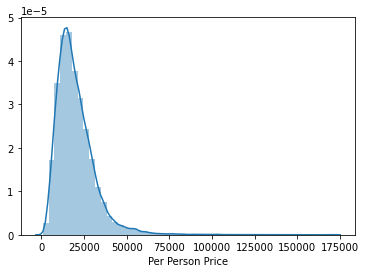

In [22]:
# Checking skewness for dependent Variable. It shows the dependent variable is 'right skewed'. 
sns.distplot(df['Per Person Price'])
plt.show()

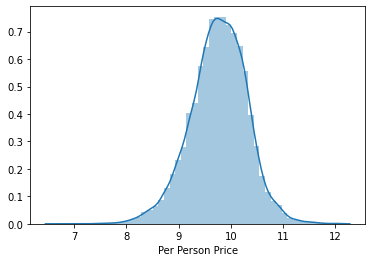

In [23]:
# Log transformed dependent variable
sns.distplot(np.log1p(df['Per Person Price']))
plt.show()

# Data Preprocessing and Feature Engineering

In [24]:
# 'Places Covered' was similar to 'Destination' hence removed and 'Uniq Id'  was completely unique for all rows therefore did not make sense to be used
df2.drop(['Places Covered', 'Uniq Id'], axis=1, inplace=True)
 
test.drop(['Places Covered', 'Uniq Id'], axis=1, inplace=True)

In [25]:
# Feature containing total destinations covered in a trip
df2['Total Destinations Covered'] = df2['Destination'].apply(lambda x: len(x.split('|')))

test['Total Destinations Covered'] = test['Destination'].apply(lambda x: len(x.split('|')))

In [26]:
# Feature containing total no. of sightseeing places covered in a trip
df2['Total Sightseeing Places Covered'] = df2['Sightseeing Places Covered'].apply(lambda x: len(x.split('|')) if x != 'Not Available' else -1)

test['Total Sightseeing Places Covered'] = test['Sightseeing Places Covered'].apply(lambda x: len(x.split('|')) if x != 'Not Available' else -1)

In [27]:
# Feature having total no. of days in respective trips
df2['Total days'] = df2['Itinerary'].apply(lambda x: sum(int(i) for i in (re.findall(r'[0-9]', x))))

test['Total days'] = test['Itinerary'].apply(lambda x: sum(int(i) for i in (re.findall(r'[0-9]', x))))

In [28]:
# Replacing some ratings in word form to respective number in 'Hotel Details'
df2['Hotel Details'] = df2['Hotel Details'].apply(lambda x:  x.replace('Four', '4'))
df2['Hotel Details'] = df2['Hotel Details'].apply(lambda x:  x.replace('One', '1'))
df2['Hotel Details'] = df2['Hotel Details'].apply(lambda x:  x.replace('Two', '2'))
df2['Hotel Details'] = df2['Hotel Details'].apply(lambda x:  x.replace('Three', '3'))
df2['Hotel Details'] = df2['Hotel Details'].apply(lambda x:  x.replace('Five', '5'))

test['Hotel Details'] = test['Hotel Details'].apply(lambda x:  x.replace('Four', '4'))
test['Hotel Details'] = test['Hotel Details'].apply(lambda x:  x.replace('One', '1'))
test['Hotel Details'] = test['Hotel Details'].apply(lambda x:  x.replace('Two', '2'))
test['Hotel Details'] = test['Hotel Details'].apply(lambda x:  x.replace('Three', '3'))
test['Hotel Details'] = test['Hotel Details'].apply(lambda x:  x.replace('Five', '5'))

# Using Regular Expression to obtain Average Rating of Hotels for each trip
df2['Avg Rating'] = df2['Hotel Details'].apply(lambda x: sum(float(i.replace(':', '')) for i in (re.findall(r'[:][0-9]*[.]?[0-9]+', x))) / len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) if len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) != 0 else -1)

test['Avg Rating'] = test['Hotel Details'].apply(lambda x: sum(float(i.replace(':', '')) for i in (re.findall(r'[:][0-9]*[.]?[0-9]+', x))) / len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) if len(re.findall(r'[:][0-9]*[.]?[0-9]+', x)) != 0 else -1)

In [29]:
# Dropping date features improved score
df2.drop('Travel Date', axis=1, inplace=True)
test.drop('Travel Date', axis=1, inplace=True)

In [30]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-999)


# Encoding function for few catgeorical features
def ordinal_enc(df, col, testing=False):
    if testing == False:
        df[col] = oe.fit_transform(df[col])
        
    else:
        df[col] = oe.transform(df[col])
    return df

In [31]:
cat_feature = ['Start City', 'Package Type', 'Cancellation Rules', 'Destination']

# Ordinal Encoding 'cat_feature' columns 
df2 = ordinal_enc(df2, cat_feature)
test = ordinal_enc(test, cat_feature, testing=True)

In [32]:
# Ratio feature of 'Total Sightseeing Places Covered' and 'Total days'
df2['Sightseeing per days'] = df2['Total Sightseeing Places Covered'] / (df2['Total days']) 

# Ratio feature of 'Total Destinations Covered' and 'Total days'
df2['total destination per days'] = df2['Total Destinations Covered'] / (df2['Total days'])


test['Sightseeing per days'] = test['Total Sightseeing Places Covered'] / test['Total days']
test['total destination per days'] = test['Total Destinations Covered'] / test['Total days']

In [33]:
from sklearn.feature_extraction.text import CountVectorizer

# Extracting features from text columns using CountVectorizer
def CountVect(column, train, test):
    vect = CountVectorizer()
    
    train_feature = vect.fit_transform(train[column])
    train_feature = pd.DataFrame(train_feature.todense(), columns=[(column+str(i)) for i in range(len(vect.get_feature_names()))])
    train = pd.concat([train, train_feature], axis=1)
    
    test_feature = vect.transform(test[column])
    test_feature = pd.DataFrame(test_feature.todense(), columns=[(column+str(i)) for i in range(len(vect.get_feature_names()))])
    test = pd.concat([test, test_feature], axis=1)
    
    return train, test

In [34]:
# Calling 'CountVec' function for these columns
for column in ['Sightseeing Places Covered', 'Hotel Details', 'Package Name', 'Itinerary', 'Airline']:
    df2, test = CountVect(column, df2, test)    

In [35]:
# Dropping columns after text feature extraction
df2.drop(['Sightseeing Places Covered', 'Hotel Details', 'Package Name', 'Itinerary', 'Airline'], axis=1, inplace=True)

test.drop(['Sightseeing Places Covered', 'Hotel Details', 'Package Name', 'Itinerary', 'Airline'], axis=1, inplace=True) 

In [36]:
test.head()

,Package Type,Destination,Start City,Flight Stops,Meals,Cancellation Rules,Total Destinations Covered,Total Sightseeing Places Covered,Total days,Avg Rating,...,Airline53,Airline54,Airline55,Airline56,Airline57,Airline58,Airline59,Airline60,Airline61,Airline62
0,Luxury,Goa,New Delhi,0,4,Cancellation any time after making the 1st pay...,1,-1,5,4.10,...,0,0,0,0,0,0,0,0,0,0
1,Luxury,Bandipur,New Delhi,0,4,This cancellation policy is applicable for boo...,1,1,2,4.40,...,0,0,0,0,0,0,0,0,0,0
2,Standard,Munnar,New Delhi,2,3,This cancellation policy is applicable for boo...,1,4,3,-1.00,...,0,0,0,0,0,0,0,0,0,0
3,Deluxe,Munnar,Mumbai,1,3,This cancellation policy is applicable for boo...,1,6,3,-1.00,...,0,0,0,0,0,0,0,0,0,0
4,Luxury,Cochin|Munnar|Thekkady|Allepey,New Delhi,0,4,Cancellation any time after making the 1st pay...,4,10,5,4.55,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df2.shape

(21000, 4313)

# Model Selection

In [38]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LassoCV, ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.tree import DecisionTreeRegressor
from category_encoders import MEstimateEncoder
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.svm import SVR
import lightgbm as lgb
import xgboost as xgb

In [39]:
# Separating and storing independent and dependent variable in X and y respectively
X, y = df2.drop('Per Person Price', axis=1), df2['Per Person Price']

In [40]:
# Stacking regressor function to ensemble LGBM and CatBoost
def get_stacking():
    level0 = [('lgbm_regressor', lgb.LGBMRegressor(n_estimators=3000, max_depth=11, learning_rate=0.06, num_leaves=40)),
               #('XGB_regressor', xgb.XGBRegressor(n_estimators=700, objective='reg:squarederror', max_depth=7, learning_rate=0.06, colsample_bytree=0.9, subsample=0.8)),
               ('catboost', CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=2000, depth=6))]
    
    level1 = LinearRegression()
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

# LGBM performance 

In [41]:
# K-Fold Cross Validation 
kf = KFold(n_splits=10, shuffle=True)
scores = []
for fold, (train_index, test_index) in enumerate(kf.split(X, y), 1):
    X_train = X.iloc[train_index]
    X_train = ordinal_enc(X_train, cat_feature)
    
    y_train = np.log1p(y.iloc[train_index])
    
    X_test = X.iloc[test_index]
    X_test = ordinal_enc(X_test, cat_feature, testing=True)

    y_test = y.iloc[test_index]
    
    #model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.03)
    #model = RandomForestRegressor(n_estimators=200, n_jobs=-1)
    #model = ElasticNet()
    model = lgb.LGBMRegressor(n_estimators=2500, max_depth=11, learning_rate=0.05, num_leaves=40)
    #model = xgb.XGBRegressor(n_estimators=590, objective='reg:squarederror', max_depth=7, learning_rate=0.06, min_child_weight=1.2)
    #model = get_stacking()
    #model = ExtraTreesRegressor(n_estimators=500, bootstrap=True, n_jobs=-1)
    #model = LinearRegression()
    #model = KNeighborsRegressor(weights='distance', n_neighbors=15)
    #model = CatBoostRegressor(silent=True,learning_rate=0.18, n_estimators=1700, depth=6)
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
 
    score = np.sqrt(mean_squared_log_error(y_test, np.expm1((pred))))
    print(f'RMSLE score for fold {fold} is {score}')
    scores.append(score)

print(f'Mean RMSLE score is {np.mean(scores)}')     

RMSLE score for fold 1 is 0.16425209762557386
RMSLE score for fold 2 is 0.15850760104442105
RMSLE score for fold 3 is 0.15532924859255232
RMSLE score for fold 4 is 0.16707937948463222
RMSLE score for fold 5 is 0.15356497957272838
RMSLE score for fold 6 is 0.17381062747283751
RMSLE score for fold 7 is 0.1471130876311855
RMSLE score for fold 8 is 0.16153380182075983
RMSLE score for fold 9 is 0.14817993517581438
RMSLE score for fold 10 is 0.1556281967004952
Mean RMSLE score is 0.15849989551210003


# Model Training and Prediction

In [300]:
# Stack Model 
model = get_stacking() # <-- Performed Best

In [301]:
# Log transforming Target Variable before training
y_ = np.log1p(y)

# Model Training
model.fit(X, y_)

StackingRegressor(cv=5,
                  estimators=[('lgbm_regressor',
                               LGBMRegressor(learning_rate=0.06, max_depth=11,
                                             n_estimators=3000,
                                             num_leaves=40)),
                              ('catboost',
                               <catboost.core.CatBoostRegressor object at 0x0000024DA3385188>)],
                  final_estimator=LinearRegression())

In [302]:
# Making Predictions and using 'expm1' to convert it back to original form
sub = pd.DataFrame(np.expm1(model.predict(test)), columns=['Per Person Price'])

In [303]:
# Saving Predictions
sub.to_csv('sub_ensembleSTACK_lgb_catboost_lr_countvec.csv', index=False)

In [304]:
sub

,Per Person Price
0,19389.820849
1,11832.206036
2,5352.769612
3,7219.301968
4,21585.722077
...,...
8995,11955.815337
8996,15526.501926
8997,16477.858873
8998,21026.495452
